# PHD Deepak2880 Process on Train Data EDA

####  $ Long $ Term $ Stock $ Price $ Growth $ Prediction $ using $ NLP $ on $ 10-K $ Financial $ Reports 

# Problem Statement

A 10-K FInancial Report is a comprehensive report which must be filed annually by all publicly traded companies about its financial performance. These reports are filed to the US Securities Exchange Commission (SEC). This is even more detailed than the annual report of a company. The 10K documents contain information about the Business' operations, risk factors, selected financial data, the Management's discussion and analysis (MD&A) and also Financial Statements and supplementary data.

I have been expected to build an NLP pipeline that ingests 10-K reports of various publicly traded companies and build a machine learning model which can uncover the hidden signals to predict the long term stock performance of a company from the 10-K docs using the ‘Loughran McDonald Master Dictionary’. The Dictionary contain words that are specifically curated in the context of financial reports

# 1. Bussiness Understanding

A 10-K FInancial Report is a comprehensive report which must be filed annually by
all publicly traded companies about its financial performance. These reports are filed
to the US Securities Exchange Commission (SEC). This is even more detailed than
the annual report of a company. The 10K documents contain information about the
Business' operations, risk factors, selected financial data, the Management's
discussion and analysis (MD&A) and also Financial Statements and supplementary
data. 10-K reports are very important for investors and Warren Buffet consistently
cites these reports as a great source of information about a company's potential to
succeed.

In this problem statement we have to Extract the 10-K FORM from the given "10k_filing_info". Once we get all the 10-K FORM then we have to predict the long term stock performance of a company from the 10-K docs.

BUSINESS: This provides an overview of the company’s main operations, including its products and services..

RISK FACTORS: These outline any and all risks the company faces or may face in the future. The risks are typically listed in order of importance.

SELECTED FINANCIAL DAT: This section details specific financial information about the company over the last five years. This section presents more of a near-term view of the company’s recent performance.

MANAGEMENT’S DISCUSSIONAND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS: Also known as MD&A, this gives the company an opportunity to explain its business results from the previous fiscal year. This section is where the company can tell its story in its own words.

FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA: This includes the company’s audited financial statements including the income statement, balance sheets, and statement of cash flows. A letter from the company’s independent auditor certifying the scope of their review is also included in this section.

LOUGHRAN MCDONALD MASTER DICTIONARY:

 I have build a predictive algorithm using the 10-K forms of different companies with respect to Loughran McDonald master dictionary.This dictionary contain different type of words such as:
1. Positive
2. Negataive
3. Uncertainity
4. Litigious
5. Constraining
6. Interesting
7. Modal
8. Irregular verbs
9. Harvard IV

All these words are specially curated in context of Financial Reports.

# 2. Problem Faced 

## 2.1 Data Extraction (Web Scrapping)

Major Problem faced during the Extraction of the 10-K FORM was the size of file in the URL. Size of file is around 115MB for each, Also each URL contains approximately 8-12 documents, out of those doucements I have to extract only 10-K FORMS.I cracked this using soup library.
Now new problem was waiting. There are around 2500 URL present. I Have to extract 10-K FORM for each URL. FIrst I tried only on 10-15 URL. It was taking around 20-25 minutes, then I decided that within a single loop its difficult to extract all the 10-K FORM also there are high chances of getting my IP ADDRESS blocked as all the url are sitting on the US GOV. server. They can find my activity as DDOS. So finally I decided to go with 1000 URL at a time. For downloading 1000 URL and extract 10-K FORM it took around 4 HRS. I tried to use multiprocessing.pool library to extract at a very few mins but due to DDOS I did not use this mehtod.

Collecting the 10-k Form data from the Securities and Exchange Commission available on EDGAR(Electronic Data Gathering, Analysis, and Retrieval)

## 2.2 Feature Extraction (Pre- Processing)

After Extracting all the 10-K FORM new problem is waiting. Problem was to extract only given feature from the 10-K FORM. I almost search every file thst I have extracted for patterns. But in such limited span of time I could find only some features. Then by using Regular Expression I extracted the desired data from the 10-Kform. I am able to get around 30-40% feature only.
I will improve my Reguar expresions to get more feature.

Cleaning all the text data of 10-k Forms by removing all the unneccassary html characters from it.
Extracting the information of Business, Risk factors, Selected Financial Data, Management Discussion Analysis of Fonancial Condition and Operations, Financial Statements Supplementary Data form the forms as they contain useful information about the company.
Pre-proccessing of the extracted data and EDA of extracted data.
   1. Tokenizing all the words.
   2. Removing stopwords from the data.
Getting number of word counts from the data with respect to different type of words in Loughran Mc Donald master dictionary.
Visualisations to get the insight from the data.
Spllitting the data into train and validation to check the performance of the Algorithm.
Performing Smoting as this is a highly class imbalance problem with almost {0:0.3,1:0.7} percentages.

# 2.3 Model Building

Applying Machine learning Algorithms for predictions on data.
1. Logistic Regression without Grid Search
2. Logistic Regression with Grid Search
3. Random Forest Classifier with Gird Search
4. Gradient Boosting Algorithm with Grid Search

# Conclusion

### Note: Result of the below can be find in "B65_PHD_2880_Deepak_Model_Create_Train_Test.ipynb"

After performing all the task I observed that a maximum F1-score macro of 73 is achieved on validation data using Gradient Boosting Algorithm followed by F1-score of 72 on validation data using Random Forest Classifier.

    S.no    Classifier                                    F1-Score macro  F1-Score macro
                                                             On Train      On Validation

    1   Logistic Regression without Grid Search                 58            55
    2   Logistic Regression with Grid Search                    58            55
    3   Random Forest Classifier with Grid Search               80            71
    4   Gradient Boosting Classifeir with Grid Search           85            73

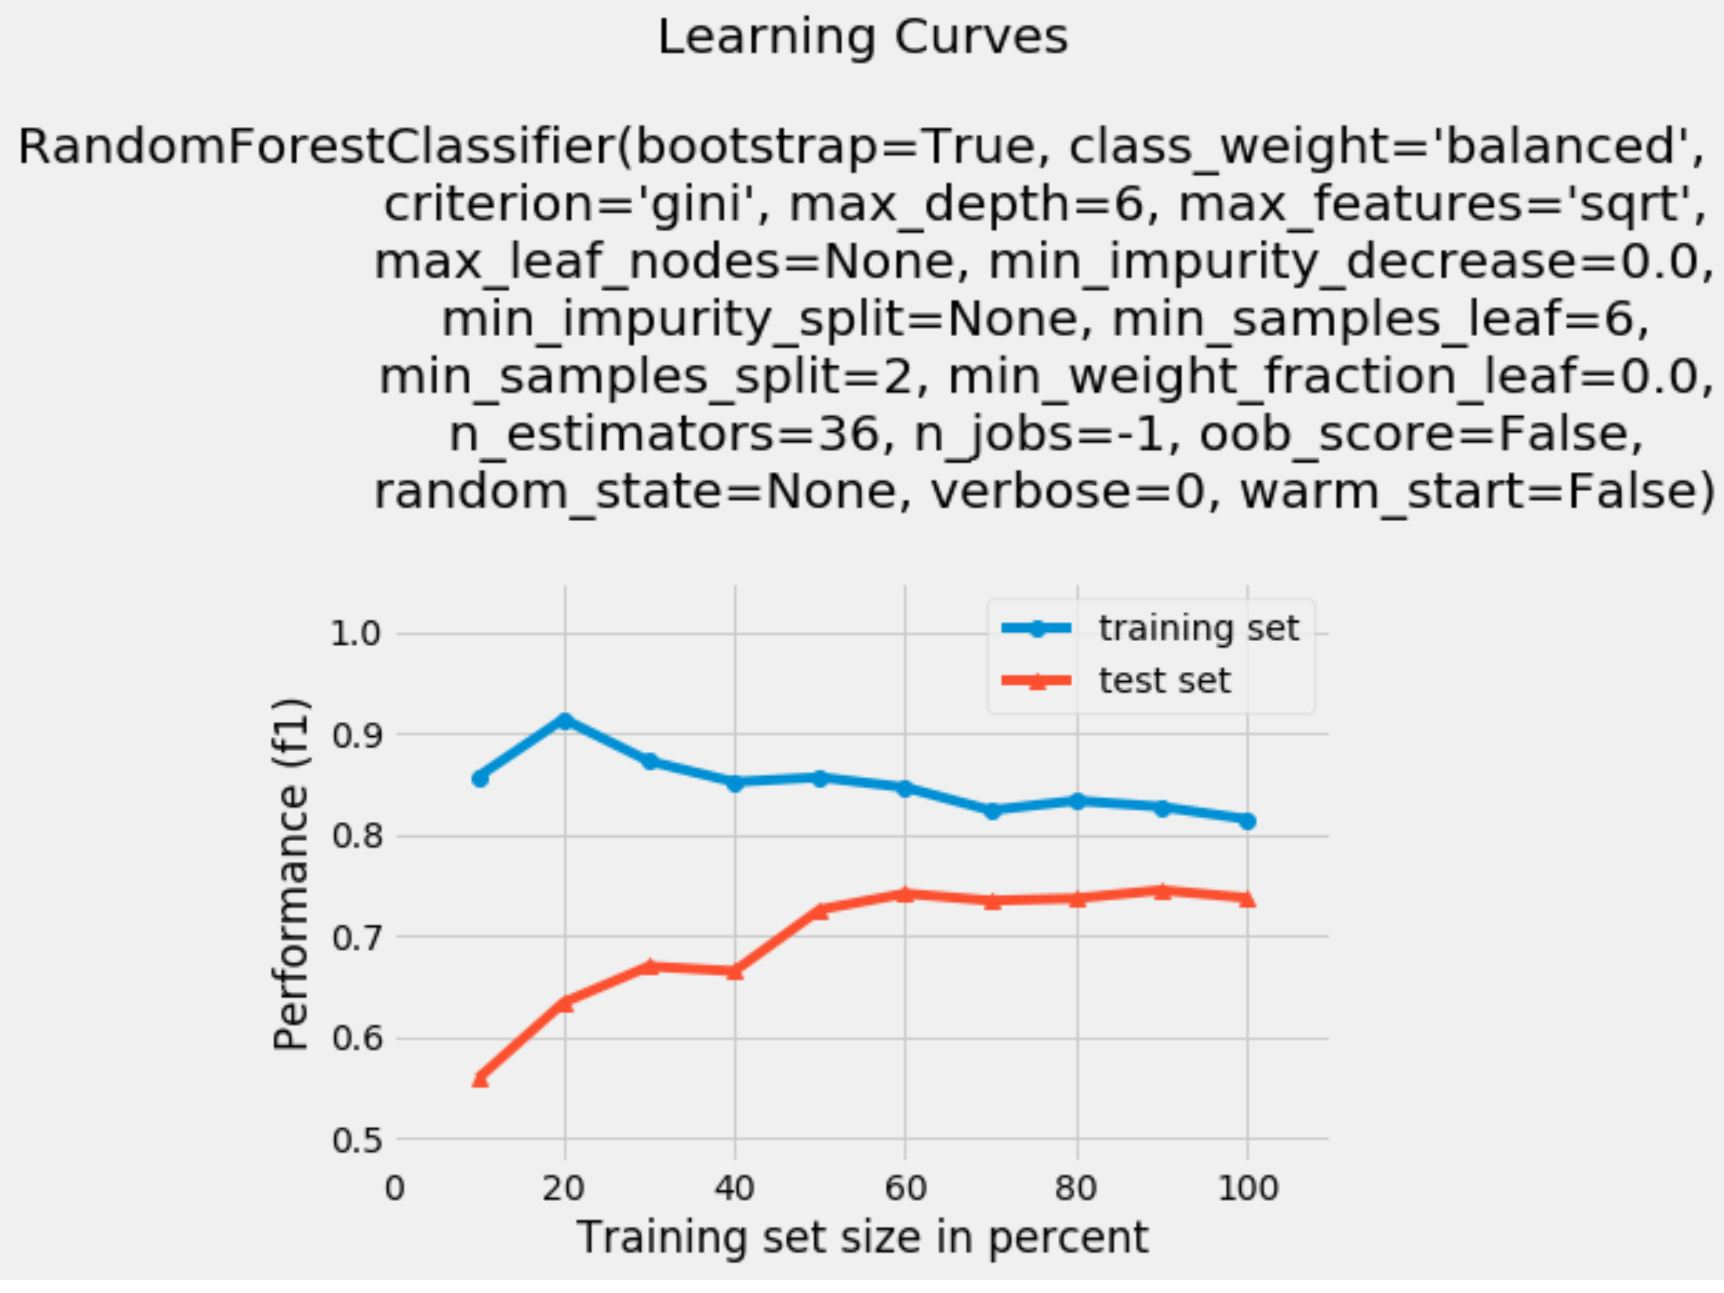

In [141]:
from IPython.display import Image
Image(filename=r'C:\Users\deepa\Pictures\RFGS.JPG')

Predicting the long term growth of a company using 10-k form with the help of Lougran McDonald master dictionary. I have used four models namely, logistic Regression, Random Forest, Decision Tree Classifier, Gradient Boosting Algorithm on the preprocessed data. Ouut of which Gradient Boosting and Random Forest performed the best with a F1-score macro of 72 and 72 respectively.

This pipeline code of nltk and machine learning models will definetely help in favour of investors as this gives a better understanding of a companies growth and and will be proved as a useful tool for investors to make some crucial decisions F1-score macro of 72

  # 3 $DATA$ $PREPROCESSING$

## 3.1. Load the Module to Read the CSV File

In [1]:
import os 
import re
import pandas as pd
import time
import numpy as np
import swifter

In [2]:
data_1 = pd.read_csv(r'final_updated_1000.csv')
data_2 = pd.read_csv(r'final_updated_2000.csv')
data_3 = pd.read_csv('final_updated_2000_2568.csv')
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)

(981, 5)
(984, 5)
(558, 5)


## 3.2. Merge the CSV File

In [3]:
%%time
data_4 = pd.concat([data_1, data_2], ignore_index= True)
data = pd.concat([data_4, data_3], ignore_index= True)

Wall time: 14.1 ms


In [4]:
data.head()

ticker      cik filing_date  \
0     FE  1031296  2012-02-28   
1     CL    21665  2015-02-19   
2    PRU  1137774  2016-02-19   
3   EBAY  1065088  2001-03-28   
4    CAM   941548  2005-02-25   

                                            sentence  long_term_outlook  
0  ['1\nfe-12312011x10k.htm\n10-K\n\n\n\n\n\n\nFE...                  0  
1  ['1\ncl-12312014x10k.htm\nCOLGATE-PALMOLIVE 10...                  0  
2  ['1\npfi201510-k.htm\n10-K\n\n\n\n\n\n\n10-K\n...                  1  
3  ['1\nf70837e10-k.txt\nFORM 10-K FISCAL YEAR EN...                  1  
4  ["1\nh21764e10vk.htm\nCOOPER CAMERON CORP.- DE...                  1

In [5]:
wdata = data.iloc[:,3:].copy()
del data_1,data_2,data_3

In [6]:
def clean(Data):
    Data = Data.replace('\\xa0','')
    Data = Data.replace('\\n','')
    Data = re.sub('\s\s+',' ',Data)
    Data = re.sub('\n',' ',Data)
    Data = re.sub('[^a-zA-Z\s]','',Data)
    Data = re.sub(r'\d+', '', Data)
    Data = re.sub('xa','',Data)
    Data = re.sub(' +', ' ', Data)
    return Data

In [7]:
%%time
wdata["clean_text"] = wdata["sentence"].swifter.apply(clean)


Wall time: 5min 23s


In [8]:
wdata.head()

sentence  long_term_outlook  \
0  ['1\nfe-12312011x10k.htm\n10-K\n\n\n\n\n\n\nFE...                  0   
1  ['1\ncl-12312014x10k.htm\nCOLGATE-PALMOLIVE 10...                  0   
2  ['1\npfi201510-k.htm\n10-K\n\n\n\n\n\n\n10-K\n...                  1   
3  ['1\nf70837e10-k.txt\nFORM 10-K FISCAL YEAR EN...                  1   
4  ["1\nh21764e10vk.htm\nCOOPER CAMERON CORP.- DE...                  1   

                                          clean_text  
0  fexkhtmKFEKUNITED STATES SECURITIES AND EXCHAN...  
1  clxkhtmCOLGATEPALMOLIVE K CLK UNITED STATES SE...  
2  pfikhtmKKTable of ContentsUNITED STATESSECURIT...  
3  fektxtFORM K FISCAL YEAR ENDED DECEMBER UNITED...  
4  hevkhtmCOOPER CAMERON CORP DECEMBER evkTable o...

# 4. FEATURE EXTRACTION

In [9]:
look_up = {'BUSINESS': r'ITEM.{,20}BUSINESS(.*?)ITEM.?\d',
          'RISK FACTORS': r'ITEM.{,20}RISK.{,3}FACTORS(.*?)ITEM.?\d',
          'SELECTED FINANCIAL DATA': r'ITEM.{,20}SELECTED.{,3}(?:CONSOLIDATED.{,3})?FINANCIAL.{,3}DATA(.*?)ITEM.?\d',
          'MDA': r'ITEM.{,20}MANAGEMENT.*DISCUSSION.{,3}AND.{,3}ANALYSIS.{,3}OF.{,3}FINANCIAL.{,3}CONDITION.{,3}AND.{,3}RESULTS.{,3}OF.{,3}OPERATIONS(.*?)ITEM.?\d',
          'FSS': r'ITEM.{,20}FINANCIAL.*STATEMENTS.{,3}AND.{,3}SUPPLEMENTARY.{,3}DATA(.*?)ITEM.?\d'}

In [10]:
def update_filter_dic(data):
    if filter_dic.get('BUSINESS'):
        b = filter_dic.get('BUSINESS')
        r = filter_dic.get('RISK FACTORS')
        s = filter_dic.get('SELECTED FINANCIAL DATA')
        m = filter_dic.get('MDA')
        f = filter_dic.get('FSS')
    else:
        b,r,s,m,f = [],[],[],[],[]
    b.append(data['BUSINESS'])
    r.append(data['RISK FACTORS'])
    s.append(data['SELECTED FINANCIAL DATA'])
    m.append(data['MDA'])
    f.append(data['FSS'])
    filter_dic['BUSINESS'] = b.copy()
    filter_dic['RISK FACTORS'] = r.copy()
    filter_dic['SELECTED FINANCIAL DATA'] = s.copy()
    filter_dic['MDA'] = m.copy()
    filter_dic['FSS'] = f.copy()
print("Updated Sucessfully!")

Updated Sucessfully!


In [ ]:
'''def parse_data(data_web):
    return_data = {}
    data_web = data_web.replace('\\xa0', ' ')
    for item,pattern in look_up.items():
        return_data[item]=''
        filter_data=re.findall(pattern,data_web)
        if len(filter_data)>=1:
            return_data[item] = filter_data[0]
    return return_data'''

In [11]:
def parse_data(data_web):
    return_data = {}
    data_web = data_web.replace("xa0",'')
    for item,pattern in look_up.items():
        return_data[item]=''
        filter_data=re.findall(pattern,data_web)#re.IGNORECASE | re.DOTALL | re.MULTILINE
        if item == "BUSINESS":
          if len(filter_data)>=1:
            return_data[item] = filter_data[0]
          else:
            if len(data_web)>=30000:
              return_data[item] = [data_web[5000:15000]]
            else :
              return_data[item] = [data_web[0:3000]]
        elif item == 'RISK FACTORS':
          if len(filter_data)>=1:
            return_data[item] = filter_data[0]
          else:
            if len(data_web)>=30000:
              return_data[item] = [data_web[5000:15000]]
            else:
              return_data[item] = [data_web[3000:6000]]
        elif item == 'SELECTED FINANCIAL DATA':
          if len(filter_data)>=1:
            return_data[item] = filter_data[0]
          else:
            if len(data_web)>=10000:
              return_data[item] = [data_web[8000:12000]]
            else:
              return_data[item] = [data_web[3000:6000]]  
        elif item == 'MDA':
          if len(filter_data)>=1:
            return_data[item] = filter_data[0]
          else:
            if len(data_web)>=10000:
              return_data[item] = [data_web[8000:12000]]
            else:
              return_data[item] = [data_web[6000:8000]] 
        else :
          if len(filter_data)>=1:
            return_data[item] = filter_data[0]
          else:
            if len(data_web)>=10000:
              return_data[item] = [data_web[8000:12000]]
            else:
              return_data[item] = [data_web[3000:6000]]               

    return return_data

In [12]:
%%time
g= []
for t in wdata["sentence"]:
    tm = parse_data(t)
    g.append(tm.copy())

Wall time: 25.2 s


In [13]:
filter_dic = {'BUSINESS':None,'RISK FACTORS':None,'SELECTED FINANCIAL DATA':None,'MDA':None,'FSS':None}

In [14]:
for k in g:
    update_filter_dic(k)

In [15]:
sentence_no_clean = pd.DataFrame(filter_dic)

In [16]:
sentence_no_clean.head(15)

BUSINESS  \
0   The CompanyFirstEnergy Corp. was organized und...   
1   (a) General Development of the BusinessColgate...   
2   \Overview\Prudential Financial, Inc., a financ...   
3   \n\n     This Annual Report on Form 10-K conta...   
4   \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   
5   GENERALPentair plc is a focused diversified in...   
6   \n \n  (a) General Development of the Business...   
7   .\n\nGENERAL\n\nCMS ENERGY\n\n     CMS Energy,...   
8   [ntal health Direct response, television,\n   ...   
9   \n\nThe Kroger Co. (the "Company") was founded...   
10  \n \nGENERAL\n \n     Apache Corporation (Apac...   
11  [in and Disagreements with Accountants on Acco...   
12  [ic markets for DENTSPLY\'s dental products ca...   
13   \nGeneral  Pioneer is a Delaware corporation ...   
14  [n\n\n\n\n Item 14.\n\\n \nPrincipal Accountan...   

                                         RISK FACTORS  \
0   We operate in a business environment that invo...   
1   Set forth below is a summary of the material r...   
2   \You should carefully consider the following r...   
3   [largest and most popular online marketplace. ...   
4   [gs-Investment Plan\n\1st through 8th Amend.to...   
5   You should carefully consider all of the infor...   
6   [geographic area financial data refer to the\n...   
7   [---------------------------------------------...   
8   [ntal health Direct response, television,\n   ...   
9   [ditions. Additional information regarding the...   
10  [MANAGEMENT......................................   
11  [in and Disagreements with Accountants on Acco...   
12  [ic markets for DENTSPLY\'s dental products ca...   
13    The nature of the business activities conduc...   
14  [n\n\n\n\n Item 14.\n\\n \nPrincipal Accountan...   

                              SELECTED FINANCIAL DATA  \
0   For the Years Ended December 31,\2011\2010(1)\...   
1   Refer to the information set forth under the c...   
2   \We derived the selected consolidated income s...   
3   \n\n     The following selected consolidated f...   
4   \n\\\\\The information set forth under the cap...   
5   The following table sets forth our selected hi...   
6   \n \n  Refer to the information set forth unde...   
7   .\n\nCMS ENERGY\n\n     Selected financial inf...   
8   [in 78 branch offices.\n\n\nAdditional informa...   
9   \n \n                            SELECTED FINA...   
10  \n \n     The following table sets forth selec...   
11  [warehouses in the United States, Canada, and ...   
12  [osition it well to take advantage of\nany opp...   
13    The following selected consolidated financia...   
14  [d parties across dozens of\nproduct categorie...   

                                                  MDA  \
0   OVERVIEWEarnings available to FirstEnergy Corp...   
1   Executive Overview and OutlookColgate-Palmoliv...   
2   \You should read the following analysis of our...   
3   \n\n                           FORWARD LOOKING...   
4   \n\\\\\The information set forth under the cap...   
5   Forward-looking StatementsThis report contains...   
6   [                                     Chief of...   
7   [, Financial Statement Schedules and Reports o...   
8   [in 78 branch offices.\n\n\nAdditional informa...   
9   [.\n\n\nITEM 4. SUBMISSION OF MATTERS TO A VOT...   
10  [nt may be held by\nthose subsidiaries. Apache...   
11  [warehouses in the United States, Canada, and ...   
12  [osition it well to take advantage of\nany opp...   
13   \nFinancial and Operating Performance  Pionee...   
14  [d parties across dozens of\nproduct categorie...   

                                                  FSS  
0   MANAGEMENT REPORTSManagement’s Responsibility ...  
1                See “Index to Financial Statements.”  
2   \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3   \n\n     Annual Financial Statements: See Part...  
4   \n\\\\\The\nfollowing consolidated financial s...  
5   MANAGEMENT’S REPORT ON INTERNAL CONTROL OVER F...  
6

In [140]:
sentence_no_clean.columns

Index(['BUSINESS', 'RISK FACTORS', 'SELECTED FINANCIAL DATA', 'MDA', 'FSS'], dtype='object')

In [ ]:
#selected_fss = sentence_no_clean[["SELECTED FINANCIAL DATA", "FSS"]]

In [ ]:
'''def Regular_Exter(Data):
    notes = Data
    Business = re.findall(r'ITEM.{,2}BUSINESS(.*?)ITEM.{,2}RISK FACTORS|ITEM.{,2}BUSINESS(.*?)ITEM.{,2}PROPERTIES|IITEM.{,2}BUSINESS(.*?)ITEM.{,2}RISK FACTORS|IITEM.{,2}BUSINESS(.*?)ITEM.{,2}PROPERTIES',notes)
    Risk = re.findall(r'ITEM.{,2}RISK(.*?)ITEM.{,2}UNRESOLVED STAFF COMMENTS|RISK FACTOR(.*?)ITEM.{,2}PROPERTIES',notes)
    MDA = re.findall(r'ITEM.{,2}MANAGEMENTS DISCUSSION AND ANALYSIS OF REGISTRANT AND SUBSIDIARIES(.*?)ITEM.{,2}FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA|ITEM{,2}MANAGEMENTS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF(.*?)ITEM{,2}FINANCIAL STATEMENTS AND SUPPLEMENTARY|MANAGEMENTS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF(.*?)FINANCIAL STATEMENTS AND SUPPLEMENTARY|MANAGEMENTS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF(.*?)FINANCIAL STATEMENTS AND SUPPLEMENTARY',notes)
    try:
        len(Business[0])>=1
        business = Business[0]
    except:
        business = ''
    try:
        len(Risk[0])>=1
        risk = Risk[0]     
    except:
        risk = business
    try:
        len(MDA[0])>=1
        mda = MDA[0]
    except:
        mda = ''
    return business,risk,mda'''

In [ ]:
'''%%time
Business = []
Risk = []
Management = []

for i in range(0,len(wdata["clean_text"])) :
  Retrived_sent = wdata["clean_text"][i]
  businesss,risk,mda = Regular_Exter(Retrived_sent)
  Business.append(businesss)
  Risk.append(risk)
  Management.append(mda)'''

In [ ]:
'''BRM = pd.DataFrame({"BUSINESS":Business,'RISK FACTORS':Risk,'MDA':Management})'''

In [ ]:
'''BRM.head()'''

In [ ]:
'''print(len(BRM.loc[BRM['BUSINESS']!='']))
print(len(BRM.loc[BRM['RISK FACTORS']!='']))
print(len(BRM.loc[BRM['MDA']!='']))'''

 # 5. Merge the Original Data and Analysis Filter

In [ ]:
'''final_data=pd.concat([BRM,selected_fss],axis=1).reset_index()'''

In [ ]:
'''len(final_data.loc[(final_data['BUSINESS']!='') & (final_data['RISK FACTORS']!='' ) &
(final_data['SELECTED FINANCIAL DATA']!='' ) &
(final_data['MDA']!='') & (final_data['FSS']!='')])'''

In [ ]:
#final_data.head(10)

In [ ]:
'''bd = final_data.loc[final_data['BUSINESS'] == ('', '', '', '')].index'''

In [ ]:
'''df = final_data.copy()'''

In [ ]:
'''df.drop(bd,axis=0,inplace=True)'''

In [ ]:
'''df.loc[df['BUSINESS'] == ('', '', '', '')].index'''

In [ ]:
'''rd = final_data.loc[final_data['RISK FACTORS'] == ('', '', '', '')].index'''

In [ ]:
'''rg = set(bd)-set(rd)'''

In [ ]:
#df.drop(rg,axis=0,inplace=True)

In [ ]:
'''df.loc[df['RISK FACTORS'] == ('', '', '', '')].index'''

In [ ]:
'''len(df.loc[(df['BUSINESS']!='') & (df['RISK FACTORS']!='' ) &
(df['SELECTED FINANCIAL DATA']!='' ) &
(df['MDA']!='') & (df['FSS']!='')])'''

In [19]:
df = sentence_no_clean.copy()

In [20]:
df.head()

BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

In [21]:
df = df.loc[(df['BUSINESS']!='') & (df['RISK FACTORS']!='' ) &
(df['SELECTED FINANCIAL DATA']!='' ) &
(df['MDA']!='') & (df['FSS']!='')]

In [22]:
df.head()

BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

In [23]:
final =pd.concat([data,df],axis=1).reset_index()

In [24]:
final.head()

index ticker      cik filing_date  \
0      0     FE  1031296  2012-02-28   
1      1     CL    21665  2015-02-19   
2      2    PRU  1137774  2016-02-19   
3      3   EBAY  1065088  2001-03-28   
4      4    CAM   941548  2005-02-25   

                                            sentence  long_term_outlook  \
0  ['1\nfe-12312011x10k.htm\n10-K\n\n\n\n\n\n\nFE...                  0   
1  ['1\ncl-12312014x10k.htm\nCOLGATE-PALMOLIVE 10...                  0   
2  ['1\npfi201510-k.htm\n10-K\n\n\n\n\n\n\n10-K\n...                  1   
3  ['1\nf70837e10-k.txt\nFORM 10-K FISCAL YEAR EN...                  1   
4  ["1\nh21764e10vk.htm\nCOOPER CAMERON CORP.- DE...                  1   

                                            BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

In [25]:
final.drop(columns='index',inplace=True,axis=1)

In [26]:
final.isna().sum()

ticker                     0
cik                        0
filing_date                0
sentence                   0
long_term_outlook          0
BUSINESS                   0
RISK FACTORS               0
SELECTED FINANCIAL DATA    0
MDA                        0
FSS                        0
dtype: int64

In [30]:
final.head()

ticker      cik filing_date  \
0     FE  1031296  2012-02-28   
1     CL    21665  2015-02-19   
2    PRU  1137774  2016-02-19   
3   EBAY  1065088  2001-03-28   
4    CAM   941548  2005-02-25   

                                            sentence  long_term_outlook  \
0  ['1\nfe-12312011x10k.htm\n10-K\n\n\n\n\n\n\nFE...                  0   
1  ['1\ncl-12312014x10k.htm\nCOLGATE-PALMOLIVE 10...                  0   
2  ['1\npfi201510-k.htm\n10-K\n\n\n\n\n\n\n10-K\n...                  1   
3  ['1\nf70837e10-k.txt\nFORM 10-K FISCAL YEAR EN...                  1   
4  ["1\nh21764e10vk.htm\nCOOPER CAMERON CORP.- DE...                  1   

                                            BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

In [29]:
final.columns

Index(['ticker', 'cik', 'filing_date', 'sentence', 'long_term_outlook',
       'BUSINESS', 'RISK FACTORS', 'SELECTED FINANCIAL DATA', 'MDA', 'FSS'],
      dtype='object')

In [31]:
%%time
final.to_csv("Merge_Data_With_Sentence.csv",index=False)

Wall time: 1min 10s


In [32]:
final.drop(columns=['sentence'],inplace=True)

In [33]:
%%time
final.to_csv("Merge_Data.csv",index=False)

Wall time: 11.4 s


In [34]:
final.head()

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  2012-02-28                  0   
1     CL    21665  2015-02-19                  0   
2    PRU  1137774  2016-02-19                  1   
3   EBAY  1065088  2001-03-28                  1   
4    CAM   941548  2005-02-25                  1   

                                            BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

In [36]:
train_data=final.loc[(final['BUSINESS']!="") & (final['RISK FACTORS']!="") & (final['SELECTED FINANCIAL DATA']!="") & (final['MDA']!="") & (final['FSS']!="")]

In [38]:
train_data.head()

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  2012-02-28                  0   
1     CL    21665  2015-02-19                  0   
2    PRU  1137774  2016-02-19                  1   
3   EBAY  1065088  2001-03-28                  1   
4    CAM   941548  2005-02-25                  1   

                                            BUSINESS  \
0  The CompanyFirstEnergy Corp. was organized und...   
1  (a) General Development of the BusinessColgate...   
2  \Overview\Prudential Financial, Inc., a financ...   
3  \n\n     This Annual Report on Form 10-K conta...   
4  \n\\\\\Cooper Cameron Corporation (“Cooper Cam...   

                                        RISK FACTORS  \
0  We operate in a business environment that invo...   
1  Set forth below is a summary of the material r...   
2  \You should carefully consider the following r...   
3  [largest and most popular online marketplace. ...   
4  [gs-Investment Plan\n\1st through 8th Amend.to...   

                             SELECTED FINANCIAL DATA  \
0  For the Years Ended December 31,\2011\2010(1)\...   
1  Refer to the information set forth under the c...   
2  \We derived the selected consolidated income s...   
3  \n\n     The following selected consolidated f...   
4  \n\\\\\The information set forth under the cap...   

                                                 MDA  \
0  OVERVIEWEarnings available to FirstEnergy Corp...   
1  Executive Overview and OutlookColgate-Palmoliv...   
2  \You should read the following analysis of our...   
3  \n\n                           FORWARD LOOKING...   
4  \n\\\\\The information set forth under the cap...   

                                                 FSS  
0  MANAGEMENT REPORTSManagement’s Responsibility ...  
1               See “Index to Financial Statements.”  
2  \CONSOLIDATED FINANCIAL STATEMENTSINDEX\\PageN...  
3  \n\n     Annual Financial Statements: See Part...  
4  \n\\\\\The\nfollowing consolidated financial s...

# 6. Feature Creation

In [39]:
df = train_data.copy()

In [40]:
df.dtypes

ticker                     object
cik                         int64
filing_date                object
long_term_outlook           int64
BUSINESS                   object
RISK FACTORS               object
SELECTED FINANCIAL DATA    object
MDA                        object
FSS                        object
dtype: object

In [41]:
cat_col = df.select_dtypes(include="object").columns

In [42]:
cat_col[2:]

Index(['BUSINESS', 'RISK FACTORS', 'SELECTED FINANCIAL DATA', 'MDA', 'FSS'], dtype='object')

In [43]:
df.dtypes

ticker                     object
cik                         int64
filing_date                object
long_term_outlook           int64
BUSINESS                   object
RISK FACTORS               object
SELECTED FINANCIAL DATA    object
MDA                        object
FSS                        object
dtype: object

In [44]:
df[cat_col[2:]] = df[cat_col[2:]].astype(str)

In [45]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer, sent_tokenize
stopwords_english = stopwords.words('english')

In [46]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [47]:
positiveWordsFile = r'PositiveWords.txt'
nagitiveWordsFile = r'NegativeWords.txt'
uncertainty_dictionaryFile = r'uncertainty_dictionary.txt'

In [48]:
# Loading positive words
with open(positiveWordsFile,'r') as posfile:
    positivewords=posfile.read().lower()
positiveWordList=positivewords.split('\n')

In [49]:
# Loading negative words
with open(nagitiveWordsFile ,'r') as negfile:
    negativeword=negfile.read().lower()
negativeWordList=negativeword.split('\n')

In [50]:
# calculating uncertainty_score
with open(uncertainty_dictionaryFile ,'r') as uncertain_dict:
    uncertainDict=uncertain_dict.read().lower()
uncertainDictionary = uncertainDict.split('\n')

In [51]:
# Calculating positive score 
def positive_score(text):
    numPosWords = 0
    #ss = token_lemt(text)
    rawToken = tokenizer(text)
    
    for word in rawToken:
        if word in positiveWordList:
            numPosWords  += 1
    
    sumPos = numPosWords
    return sumPos

In [52]:
# Calculating Negative score
def negative_word(text):
    numNegWords=0
    #ss = token_lemt(text)
    rawToken = tokenizer(text)
    
    for word in rawToken:
        if word in negativeWordList:
            numNegWords -=1
    sumNeg = numNegWords 
    sumNeg = sumNeg * -1
    return sumNeg

In [53]:
# Calculating polarity score
def polarity_score(positiveScore, negativeScore):
    pol_score = (positiveScore - negativeScore) / ((positiveScore + negativeScore) + 0.000001)
    return pol_score

In [54]:
def uncertainty_score(text):
    uncertainWordnum =0
    #ss = token_lemt(text)
    rawToken = tokenizer(text)
    
    for word in rawToken:
        if word in uncertainDictionary:
            uncertainWordnum +=1
    sumUncertainityScore = uncertainWordnum 
    
    return sumUncertainityScore

In [55]:
# Tokenizer
def tokenizer(text):
    #text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = list(filter(lambda token: token not in stopwords_english, tokens))
    return filtered_words

In [56]:
def clean_data(bdata):
    bdata = str(bdata)
    var = re.sub(r"[&|\,|\.|\?|\!|\(|\)|\n|\/]","",bdata).strip()
    var = re.sub(r"[\’]","",var.lower())
    var = re.sub(r"[\“\”\$\`\`\''\``]","",var)
    var = var.replace("''","")
    var = var.replace("``","")
    var = re.sub(r"[\-]","",var)
    var = re.sub(r"[\d+]","",var)
    var = re.sub(r"[\*]{,8}","",var)
    var = re.sub(r"[\—]","",var)
    var = re.sub(r"[\:]","",var)
    var = re.sub(r"[\;\%\-]","",var)
    var = re.sub("[^a-zA-z0-9\s']"," ", var)
    var = re.sub("[']","", var)
    var = re.sub("[\\\\]","", var)
    var = re.sub(r"mw","", var)
    var = re.sub(r"``","", var)
    var = re.sub(r"\n","", var)
    var = re.sub(r"[nn]{2,20}","",var)
    var = re.sub(r"['–']{,20}","",var)
    var = re.sub(r"['q']{2,20}","",var)
    var = re.sub(r"['[[']{1,20}","",var)
    var = re.sub(r"[\]\]]","",var).strip()
    return var

In [57]:
def token_lemt(var):
    v = clean_data(var)
    words = word_tokenize(v)
    words = [word for word in words if word not in stopwords_english]
    #lemma_words = [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(i) for i in words]
    filtered = ' '.join(lemma_words)
    return filtered

In [85]:
def token_lemt_token_only(var):
    #v = clean_data(var)
    words = word_tokenize(var)
    #words = [word for word in words if word not in stopwords_english]
    #lemma_words = [lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(i) for i in words]
    #filtered = ' '.join(lemma_words)
    return lemma_words

In [59]:
# Calculating Average sentence length 
# It will calculated using formula --- Average Sentence Length = the number of words / the number of sentences
     
def average_sentence_length(text):
    ss = token_lemt(text)
    sentence_list = sent_tokenize(ss)
    tokens = tokenizer(ss)
    totalWordCount = len(tokens)
    totalSentences = len(sentence_list)
    average_sent = 0
    if totalSentences != 0:
        average_sent = totalWordCount / totalSentences
    
    average_sent_length= average_sent
    
    return round(average_sent_length)

In [60]:
#Counting total words

def total_word_count(text):
    #ss = token_lemt(text)
    tokens = tokenizer(text)
    return len(tokens)

In [61]:
# Calculating percentage of complex word 
# It is calculated using Percentage of Complex words = the number of complex words / the number of words 

def percentage_complex_word(text):
    ss = token_lemt(text)
    tokens = tokenizer(ss)
    complexWord = 0
    complex_word_percentage = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    if len(tokens) != 0:
        complex_word_percentage = complexWord/len(tokens)
    
    return complex_word_percentage

In [62]:
# Counting complex words
def complex_word_count(text):
    ss = token_lemt(text)
    tokens = tokenizer(ss)
    complexWord = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    return complexWord

In [63]:
# calculating Fog Index 
# Fog index is calculated using -- Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

def fog_index(averageSentenceLength, percentageComplexWord):
    fogIndex = 0.4 * (averageSentenceLength + percentageComplexWord)
    return fogIndex

In [70]:
%%time
df['BUSINESS'] = df['BUSINESS'].swifter.apply(token_lemt)
df['RISK FACTORS'] = df['RISK FACTORS'].swifter.apply(token_lemt)
df['SELECTED FINANCIAL DATA'] = df['SELECTED FINANCIAL DATA'].swifter.apply(token_lemt)
df['MDA'] = df['MDA'].swifter.apply(token_lemt)
df['FSS'] = df['FSS'].swifter.apply(token_lemt)


Wall time: 12min 55s


In [86]:
%%time
df['BUSINESS_Tokens'] = df['BUSINESS'].swifter.apply(token_lemt_token_only)
df['RISK_Tokens'] = df['RISK FACTORS'].swifter.apply(token_lemt_token_only)
df['SELECTED_Tokens'] = df['SELECTED FINANCIAL DATA'].swifter.apply(token_lemt_token_only)
df['MDA_Tokens'] = df['MDA'].swifter.apply(token_lemt_token_only)
df['FSS_Tokens'] = df['FSS'].swifter.apply(token_lemt_token_only)


Wall time: 2min 40s


In [72]:
%%time
df['BUSINESS_POSITIVE'] = df['BUSINESS'].swifter.apply(positive_score)
df['RISK FACTORS_POSITIVE'] = df['RISK FACTORS'].swifter.apply(positive_score)
df['SELECTED FINANCIAL DATA_POSITIVE'] = df['SELECTED FINANCIAL DATA'].swifter.apply(positive_score)
df['MDA_POSITIVE'] = df['MDA'].swifter.apply(positive_score)
df['FSS_POSITIVE'] = df['FSS'].swifter.apply(positive_score)


Wall time: 1min 46s


In [73]:
%%time
df['BUSINESS_NEGATIVE'] = df['BUSINESS'].swifter.apply(negative_word)
df['RISK FACTORS_NEGATIVE'] = df['RISK FACTORS'].swifter.apply(negative_word)
df['SELECTED FINANCIAL DATA_NEGATIVE'] = df['SELECTED FINANCIAL DATA'].swifter.apply(negative_word)
df['MDA_NEGATIVE'] = df['MDA'].swifter.apply(negative_word)
df['FSS_NEGATIVE'] = df['FSS'].swifter.apply(negative_word)


Wall time: 7min 48s


In [74]:
%%time
df['BUSINESS_UNCERTAINTY'] = df['BUSINESS'].swifter.apply(uncertainty_score)
df['RISK FACTORS_UNCERTAINTY'] = df['RISK FACTORS'].swifter.apply(uncertainty_score)
df['SELECTED FINANCIAL DATA_UNCERTAINTY'] = df['SELECTED FINANCIAL DATA'].swifter.apply(uncertainty_score)
df['MDA_UNCERTAINTY'] = df['MDA'].swifter.apply(uncertainty_score)
df['FSS_UNCERTAINTY'] = df['FSS'].swifter.apply(uncertainty_score)


Wall time: 1min 33s


In [75]:
%%time
df['BUSINESS_average_sentence_length'] = df['BUSINESS'].swifter.apply(average_sentence_length)
df['RISK_average_sentence_length'] = df['RISK FACTORS'].swifter.apply(average_sentence_length)
df['SELECTED_average_sentence_length'] = df['SELECTED FINANCIAL DATA'].swifter.apply(average_sentence_length)
df['MDA_average_sentence_length'] = df['MDA'].swifter.apply(average_sentence_length)
df['FSS_average_sentence_length'] = df['FSS'].swifter.apply(average_sentence_length)


Wall time: 5min 19s


In [76]:
%%time
df['BUSINESS_word_count'] = df['BUSINESS'].swifter.apply(total_word_count)
df['RISK_word_count'] = df['RISK FACTORS'].swifter.apply(total_word_count)
df['SELECTED_word_count'] = df['SELECTED FINANCIAL DATA'].swifter.apply(total_word_count)
df['MDA_word_count'] = df['MDA'].swifter.apply(total_word_count)
df['FSS_word_count'] = df['FSS'].swifter.apply(total_word_count)


Wall time: 40 s


In [77]:
%%time
df['BUSINESS_polarity_score'] = np.vectorize(polarity_score)(df['BUSINESS_POSITIVE'],df['BUSINESS_NEGATIVE'])
df['RISK_polarity_score'] = np.vectorize(polarity_score)(df['RISK FACTORS_POSITIVE'],df['RISK FACTORS_NEGATIVE'])
df['SELECTED_polarity_score'] = np.vectorize(polarity_score)(df['SELECTED FINANCIAL DATA_POSITIVE'],df['SELECTED FINANCIAL DATA_NEGATIVE'])
df['MDA_polarity_score'] = np.vectorize(polarity_score)(df['MDA_POSITIVE'],df['MDA_NEGATIVE'])
df['FSS_polarity_score'] = np.vectorize(polarity_score)(df['FSS_POSITIVE'],df['FSS_NEGATIVE'])

Wall time: 15 ms


In [78]:
%%time
df['BUSINESS_percentage_of_complex_words'] = df['BUSINESS'].swifter.apply(percentage_complex_word)
df['RISK_percentage_of_complex_words'] =   df['RISK FACTORS'].swifter.apply(percentage_complex_word)
df['SELECTED_percentage_of_complex_words'] = df['SELECTED FINANCIAL DATA'].swifter.apply(percentage_complex_word)
df['MDA_percentage_of_complex_words'] = df['MDA'].swifter.apply(percentage_complex_word)
df['FSS_percentage_of_complex_words'] = df['FSS'].swifter.apply(percentage_complex_word)


Wall time: 5min 11s


In [79]:
%%time
df['BUSINESS_complex_word_count'] = df['BUSINESS'].swifter.apply(complex_word_count)
df['RISK_complex_word_count'] =   df['RISK FACTORS'].swifter.apply(complex_word_count)
df['SELECTED_complex_word_count'] = df['SELECTED FINANCIAL DATA'].swifter.apply(complex_word_count)
df['MDA_complex_word_count'] = df['MDA'].swifter.apply(complex_word_count)
df['FSS_complex_word_count'] = df['FSS'].swifter.apply(complex_word_count)


Wall time: 5min 10s


In [80]:
%%time
df['BUSINESS_fog_index'] = np.vectorize(fog_index)(df['BUSINESS_average_sentence_length'],df['BUSINESS_percentage_of_complex_words'])
df['RISK_fog_index'] = np.vectorize(fog_index)(df['RISK_average_sentence_length'],df['RISK_percentage_of_complex_words'])
df['SELECTED_fog_index'] = np.vectorize(fog_index)(df['SELECTED_average_sentence_length'],df['SELECTED_percentage_of_complex_words'])
df['MDA_fog_index'] = np.vectorize(fog_index)(df['MDA_average_sentence_length'],df['MDA_percentage_of_complex_words'])
df['FSS_fog_index'] = np.vectorize(fog_index)(df['FSS_average_sentence_length'],df['FSS_percentage_of_complex_words'])

Wall time: 6.94 ms


In [81]:
df['BUSINESS_Pos_Neg_polarity'] = df['BUSINESS_polarity_score'].swifter.apply(lambda x: 1 if x>0 else 0)
df['RISK_Pos_Neg_polarity'] = df['RISK_polarity_score'].swifter.apply(lambda x: 1 if x>0 else 0)
df['SELECTED_Pos_Neg_polarity'] = df['SELECTED_polarity_score'].swifter.apply(lambda x: 1 if x>0 else 0)
df['MDA_Pos_Neg_polarity'] = df['MDA_polarity_score'].swifter.apply(lambda x: 1 if x>0 else 0)
df['FSS_Pos_Neg_polarity'] = df['FSS_polarity_score'].swifter.apply(lambda x: 1 if x>0 else 0)

In [89]:
df.head()

ticker      cik filing_date  long_term_outlook  \
0     FE  1031296  2012-02-28                  0   
1     CL    21665  2015-02-19                  0   
2    PRU  1137774  2016-02-19                  1   
3   EBAY  1065088  2001-03-28                  1   
4    CAM   941548  2005-02-25                  1   

                                            BUSINESS  \
0  companyfirstenergy corp organized law state oh...   
1  general development businesscolgatepalmolive c...   
2  overviewprudential financial inc financial ser...   
3  aual report form k contains forwardlooking sta...   
4  ncooper cameron corporation cooper cameron com...   

                                        RISK FACTORS  \
0  operate business environment involves signific...   
1  set forth summary material risk investment sec...   
2  carefully consider following risk risk exclusi...   
3  largest popular online marketplace ournmission...   
4  gsinvestment plast th amendto individual accou...   

                             SELECTED FINANCIAL DATA  \
0  year ended december million except per share a...   
1  refer information set forth caption historical...   
2  derived selected consolidated income statement...   
3  following selected consolidated financial data...   
4  nthe information set forth caption selected co...   

                                                 MDA  \
0  overviewearnings available firstenergy corp mi...   
1  executive overview outlookcolgatepalmolive com...   
2  read following analysis consolidated financial...   
3  forward looking statement document contains ce...   
4  nthe information set forth caption management ...   

                                                 FSS  BUSINESS_POSITIVE  ...  \
0  management reportsmanagements responsibility f...                 91  ...   
1                      see index financial statement                 10  ...   
2  consolidated financial statementsindexpagenumb...                221  ...   
3   aual financial statement see part iv item form k                142  ...   
4  nthenfollowing consolidated financial statemen...                 52  ...   

   BUSINESS_Pos_Neg_polarity  RISK_Pos_Neg_polarity  \
0                          0                      0   
1                          1                      0   
2                          0                      0   
3                          0                      1   
4                          1                      1   

   SELECTED_Pos_Neg_polarity  MDA_Pos_Neg_polarity  FSS_Pos_Neg_polarity  \
0                          0                     1                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          1                     0                     0   
4                          0                     0                     0   

                                     BUSINESS_Tokens  \
0  [companyfirstenergy, corp, organized, law, sta...   
1  [general, development, businesscolgatepalmoliv...   
2  [overviewprudential, financial, inc, financial...   
3  [aual, report, form, k, contains, forwardlooki...   
4  [ncooper, cameron, corporation, cooper, camero...   

                                         RISK_Tokens  \
0  [operate, business, environment, involves, sig...   
1  [set, forth, summary, material, risk, investme...   
2  [carefully, consider, following, risk, risk, e...   
3  [largest, popular, online, marketplace, ournmi...   
4  [gsinvestment, plast, th, amendto, individual,...   

                                     SELECTED_Tokens  \
0  [year, ended, december, million, except, per, ...   
1  [refer, information, set, forth, caption, hist...   
2  [derived, selected, consolidated, income, stat...   
3  [following, selected, consolidated, financial,...   
4  [nthe, information, set, forth, caption, selec...   

                                          MDA_Tokens  \
0  [o

In [87]:
df.columns

Index(['ticker', 'cik', 'filing_date', 'long_term_outlook', 'BUSINESS',
       'RISK FACTORS', 'SELECTED FINANCIAL DATA', 'MDA', 'FSS',
       'BUSINESS_POSITIVE', 'RISK FACTORS_POSITIVE',
       'SELECTED FINANCIAL DATA_POSITIVE', 'MDA_POSITIVE', 'FSS_POSITIVE',
       'BUSINESS_NEGATIVE', 'RISK FACTORS_NEGATIVE',
       'SELECTED FINANCIAL DATA_NEGATIVE', 'MDA_NEGATIVE', 'FSS_NEGATIVE',
       'BUSINESS_UNCERTAINTY', 'RISK FACTORS_UNCERTAINTY',
       'SELECTED FINANCIAL DATA_UNCERTAINTY', 'MDA_UNCERTAINTY',
       'FSS_UNCERTAINTY', 'BUSINESS_average_sentence_length',
       'RISK_average_sentence_length', 'SELECTED_average_sentence_length',
       'MDA_average_sentence_length', 'FSS_average_sentence_length',
       'BUSINESS_word_count', 'RISK_word_count', 'SELECTED_word_count',
       'MDA_word_count', 'FSS_word_count', 'BUSINESS_polarity_score',
       'RISK_polarity_score', 'SELECTED_polarity_score', 'MDA_polarity_score',
       'FSS_polarity_score', 'BUSINESS_percentage_of_comp

In [88]:
%%time
df.to_csv("Final_Train_OutPutAnalysis.csv",index=False)

Wall time: 7.33 s


# 7. Data Visualization

In [90]:
import pandas_profiling
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
cat_col_name = df.select_dtypes(include="object").columns

num_col_name = df.select_dtypes(include=["int64","float64"]).columns

print("cat_col_name\n",cat_col_name)
print("num_col_name\n",num_col_name)

cat_col_name
 Index(['ticker', 'filing_date', 'BUSINESS', 'RISK FACTORS',
       'SELECTED FINANCIAL DATA', 'MDA', 'FSS', 'BUSINESS_Tokens',
       'RISK_Tokens', 'SELECTED_Tokens', 'MDA_Tokens', 'FSS_Tokens'],
      dtype='object')
num_col_name
 Index(['cik', 'long_term_outlook', 'BUSINESS_POSITIVE',
       'RISK FACTORS_POSITIVE', 'SELECTED FINANCIAL DATA_POSITIVE',
       'MDA_POSITIVE', 'FSS_POSITIVE', 'BUSINESS_NEGATIVE',
       'RISK FACTORS_NEGATIVE', 'SELECTED FINANCIAL DATA_NEGATIVE',
       'MDA_NEGATIVE', 'FSS_NEGATIVE', 'BUSINESS_UNCERTAINTY',
       'RISK FACTORS_UNCERTAINTY', 'SELECTED FINANCIAL DATA_UNCERTAINTY',
       'MDA_UNCERTAINTY', 'FSS_UNCERTAINTY',
       'BUSINESS_average_sentence_length', 'RISK_average_sentence_length',
       'SELECTED_average_sentence_length', 'MDA_average_sentence_length',
       'FSS_average_sentence_length', 'BUSINESS_word_count', 'RISK_word_count',
       'SELECTED_word_count', 'MDA_word_count', 'FSS_word_count',
       'BUSINESS_polarit

## 7.1 Target Variable Impact

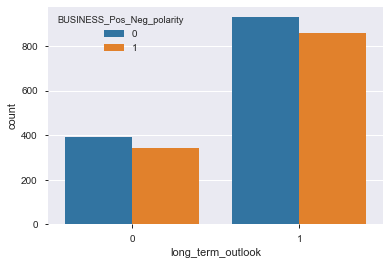

In [92]:
sns.countplot('long_term_outlook',hue='BUSINESS_Pos_Neg_polarity',data=df)

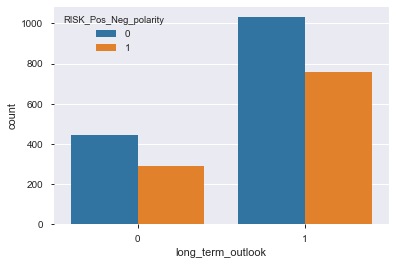

In [93]:
sns.countplot('long_term_outlook',hue='RISK_Pos_Neg_polarity',data=df)

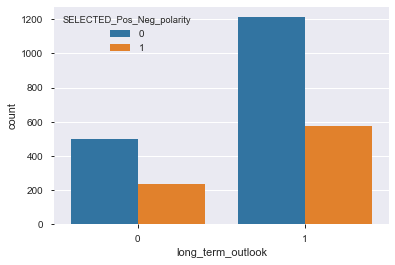

In [94]:
sns.countplot('long_term_outlook',hue='SELECTED_Pos_Neg_polarity',data=df)

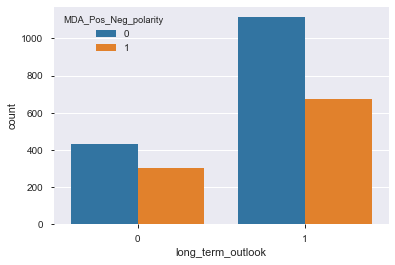

In [95]:
sns.countplot('long_term_outlook',hue='MDA_Pos_Neg_polarity',data=df)

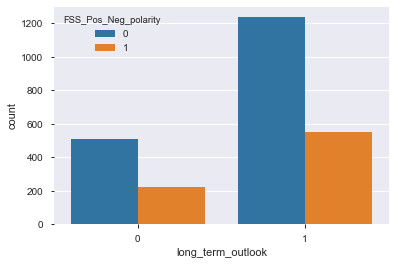

In [96]:
sns.countplot('long_term_outlook',hue='FSS_Pos_Neg_polarity',data=df)

In [97]:
plot_col_name = ['BUSINESS_word_count','RISK_word_count','SELECTED_word_count','MDA_word_count','FSS_word_count']

BUSINESS_word_count
count     2523.000000
mean      1894.660325
std       2671.090187
min          0.000000
25%        736.000000
50%        842.000000
75%       2032.000000
max      26007.000000
Name: BUSINESS_word_count, dtype: float64
The first quartile value of words_count attribute is 736.0
The shape of trimmed blogs dataframe is (1891, 64)
RISK_word_count
count     2523.000000
mean      1151.916766
std       1448.784820
min          0.000000
25%        709.000000
50%        806.000000
75%        874.000000
max      20713.000000
Name: RISK_word_count, dtype: float64
The first quartile value of words_count attribute is 709.0
The shape of trimmed blogs dataframe is (1891, 64)
SELECTED_word_count
count     2523.000000
mean       323.564011
std        859.773195
min          0.000000
25%        142.000000
50%        309.000000
75%        342.000000
max      21651.000000
Name: SELECTED_word_count, dtype: float64
The first quartile value of words_count attribute is 142.0
The shape of tr

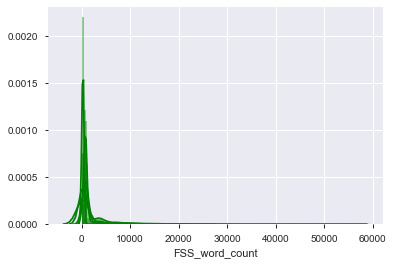

In [98]:
for k in plot_col_name:
    print(k)
    print(df[k].describe())
    q1 = np.percentile(df[k], 25)
    print(f"The first quartile value of words_count attribute is {q1}")

    blogs_df = df[df[k] > q1]
    print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

    c = df[k]
    sns.distplot(c,color='g')

The first quartile value of words_count attribute is 736.0
The shape of trimmed blogs dataframe is (1891, 64)


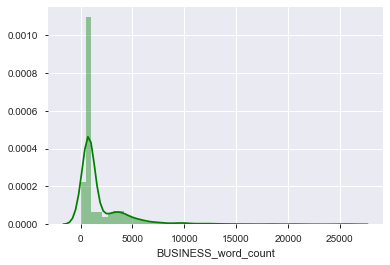

In [99]:
q1 = np.percentile(df['BUSINESS_word_count'], 25)
print(f"The first quartile value of words_count attribute is {q1}")

blogs_df = df[df['BUSINESS_word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

c = df['BUSINESS_word_count']
sns.distplot(c,color='g')

The first quartile value of words_count attribute is 709.0
The shape of trimmed blogs dataframe is (1891, 64)


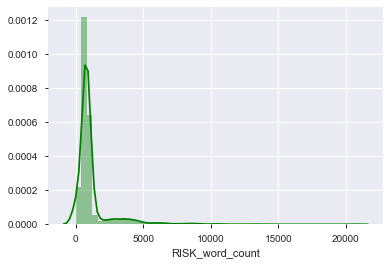

In [100]:
q1 = np.percentile(df['RISK_word_count'], 25)
print(f"The first quartile value of words_count attribute is {q1}")

blogs_df = df[df['RISK_word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

c = df['RISK_word_count']
sns.distplot(c,color='g')

The first quartile value of words_count attribute is 142.0
The shape of trimmed blogs dataframe is (1886, 64)


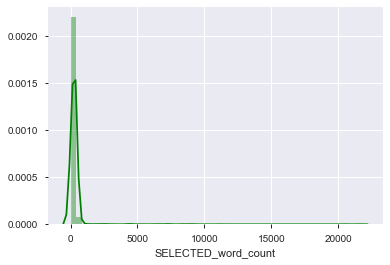

In [101]:
q1 = np.percentile(df['SELECTED_word_count'], 25)
print(f"The first quartile value of words_count attribute is {q1}")

blogs_df = df[df['SELECTED_word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

c = df['SELECTED_word_count']
sns.distplot(c,color='g')

The first quartile value of words_count attribute is 295.0
The shape of trimmed blogs dataframe is (1886, 64)


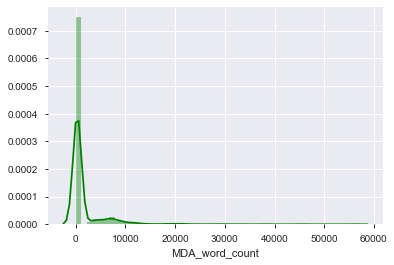

In [102]:
q1 = np.percentile(df['MDA_word_count'], 25)
print(f"The first quartile value of words_count attribute is {q1}")

blogs_df = df[df['MDA_word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

c = df['MDA_word_count']
sns.distplot(c,color='g')

The first quartile value of words_count attribute is 181.0
The shape of trimmed blogs dataframe is (1892, 64)


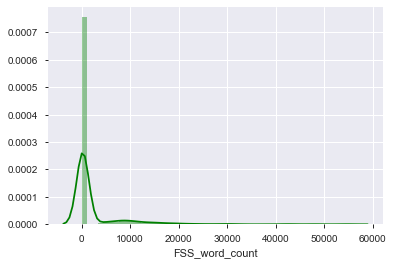

In [103]:
q1 = np.percentile(df['FSS_word_count'], 25)
print(f"The first quartile value of words_count attribute is {q1}")

blogs_df = df[df['FSS_word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

c = df['FSS_word_count']
sns.distplot(c,color='g')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

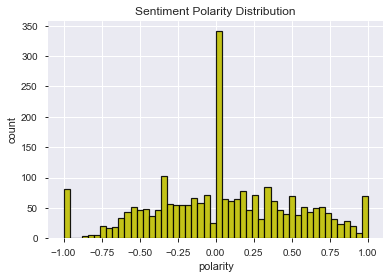

In [104]:
# Observation :Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
# Distribution of review sentiment polarity score
plt.hist(df.BUSINESS_polarity_score, bins=50,color='y',alpha=0.9, edgecolor='black', linewidth=1.2)
plt.ylabel('count')
plt.xlabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

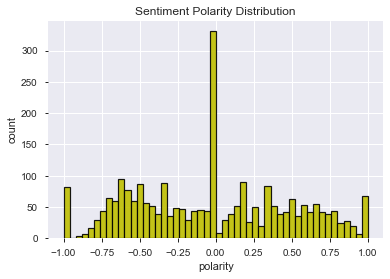

In [105]:
# Observation :Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
# Distribution of review sentiment polarity score
plt.hist(df.RISK_polarity_score, bins=50,color='y',alpha=0.9, edgecolor='black', linewidth=1.2)
plt.ylabel('count')
plt.xlabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

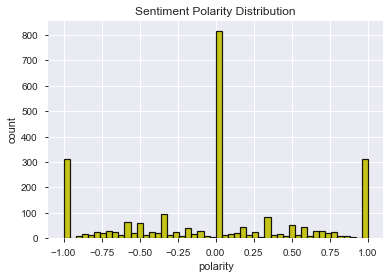

In [106]:

# Observation :Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
# Distribution of review sentiment polarity score
plt.hist(df.SELECTED_polarity_score, bins=50,color='y',alpha=0.9, edgecolor='black', linewidth=1.2)
plt.ylabel('count')
plt.xlabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

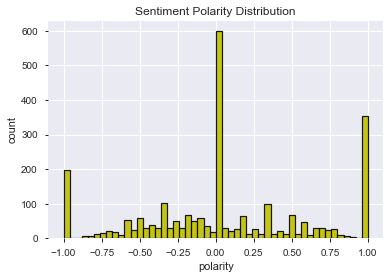

In [107]:
# Observation :Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
# Distribution of review sentiment polarity score
plt.hist(df.MDA_polarity_score, bins=50,color='y',alpha=0.9, edgecolor='black', linewidth=1.2)
plt.ylabel('count')
plt.xlabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

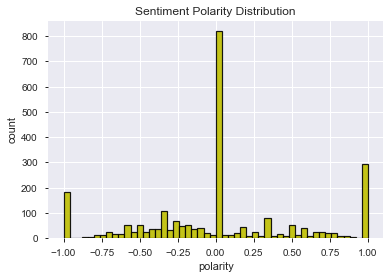

In [108]:
# Observation :Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
# Distribution of review sentiment polarity score
plt.hist(df.FSS_polarity_score, bins=50,color='y',alpha=0.9, edgecolor='black', linewidth=1.2)
plt.ylabel('count')
plt.xlabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Distribution of Positive and Negative Polarities')

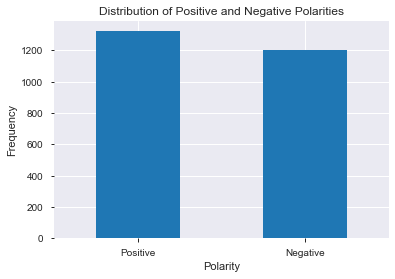

In [109]:
# Bar Plot of Positive and Negative Sentiments
df.BUSINESS_Pos_Neg_polarity.value_counts().plot(kind='bar',rot=0, alpha=1)
plt.xticks(range(2) ,['Positive' , 'Negative'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Polarities')

Text(0.5, 1.0, 'Distribution of Positive and Negative Polarities')

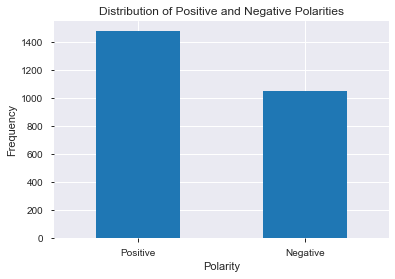

In [110]:
# Bar Plot of Positive and Negative Sentiments
df.RISK_Pos_Neg_polarity.value_counts().plot(kind='bar',rot=0, alpha=1)
plt.xticks(range(2) ,['Positive' , 'Negative'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Polarities')

Text(0.5, 1.0, 'Distribution of Positive and Negative Polarities')

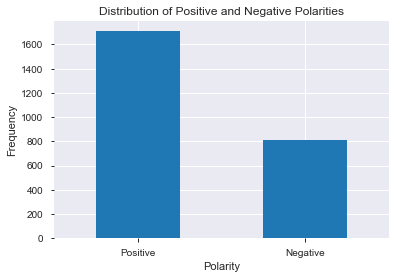

In [111]:
# Bar Plot of Positive and Negative Sentiments
df.SELECTED_Pos_Neg_polarity.value_counts().plot(kind='bar',rot=0, alpha=1)
plt.xticks(range(2) ,['Positive' , 'Negative'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Polarities')

Text(0.5, 1.0, 'Distribution of Positive and Negative Polarities')

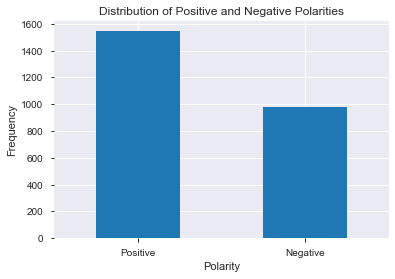

In [112]:
# Bar Plot of Positive and Negative Sentiments
df.MDA_Pos_Neg_polarity.value_counts().plot(kind='bar',rot=0, alpha=1)
plt.xticks(range(2) ,['Positive' , 'Negative'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Polarities')

Text(0.5, 1.0, 'Distribution of Positive and Negative Polarities')

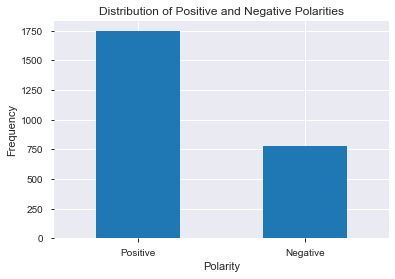

In [113]:
# Bar Plot of Positive and Negative Sentiments
df.FSS_Pos_Neg_polarity.value_counts().plot(kind='bar',rot=0, alpha=1)
plt.xticks(range(2) ,['Positive' , 'Negative'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Polarities')

In [114]:
def vocabulary_counts(vocabulary_lists):

    vocabulary = [each_word for sub_list in vocabulary_lists for each_word in sub_list]
    print("There are {} words".format(len(vocabulary)))
    values, counts = np.unique(vocabulary, return_counts=True)
    sorted_indices = np.argsort(-counts)
    values = values[sorted_indices]
    print("values=",values)
    
    counts = counts[sorted_indices]
    print("counts=",counts)
    font = {'family': 'verdana',
        'weight': 'bold',
        'size': 50}
    plt.rc('figure', facecolor='green', dpi=90, frameon=False)
    #plt.rc('font', **font)
    fig = plt.figure(figsize=(80, 80))
    plt.barh(values[:45], counts[:45])
    plt.gca().invert_yaxis()
    plt.show()

In [115]:
from wordcloud import WordCloud

def word_cloud_form(list):
  #convert list to string and generate
  vocabulary = [each_word for sub_list in vocabulary_lists for each_word in sub_list]
  unique_string=(" ").join(vocabulary)
  wordcloud = WordCloud(width = 1000, 
                      height = 500,
                      collocations = False
                     ).generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  plt.close()

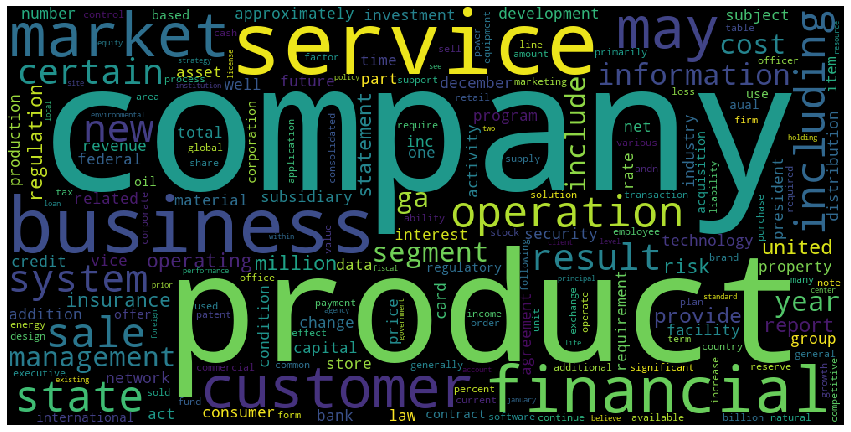

Wall time: 7.68 s


In [116]:
%%time
vocabulary_lists = df['BUSINESS_Tokens'].tolist()
word_cloud_form(vocabulary_lists)

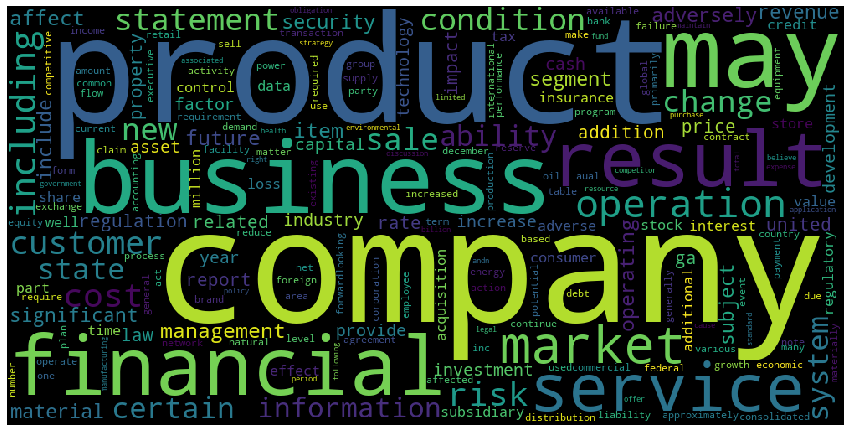

Wall time: 4.97 s


In [117]:
%%time
vocabulary_lists = df['RISK_Tokens'].tolist()
word_cloud_form(vocabulary_lists)

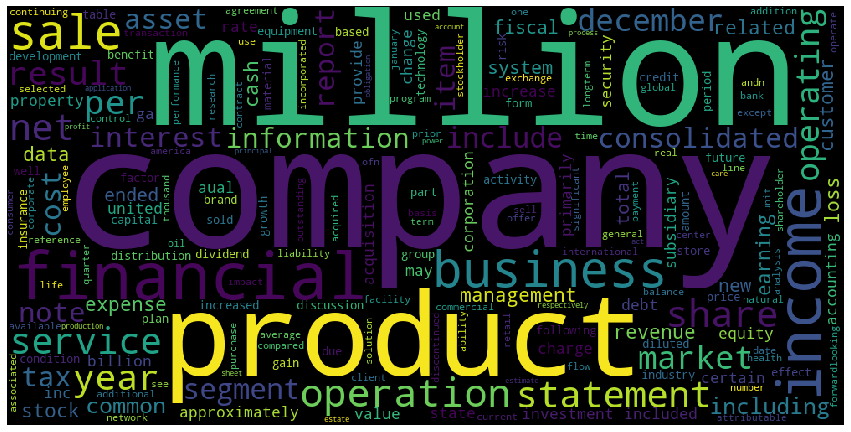

Wall time: 2.05 s


In [118]:
%%time
vocabulary_lists = df['SELECTED_Tokens'].tolist()
word_cloud_form(vocabulary_lists)

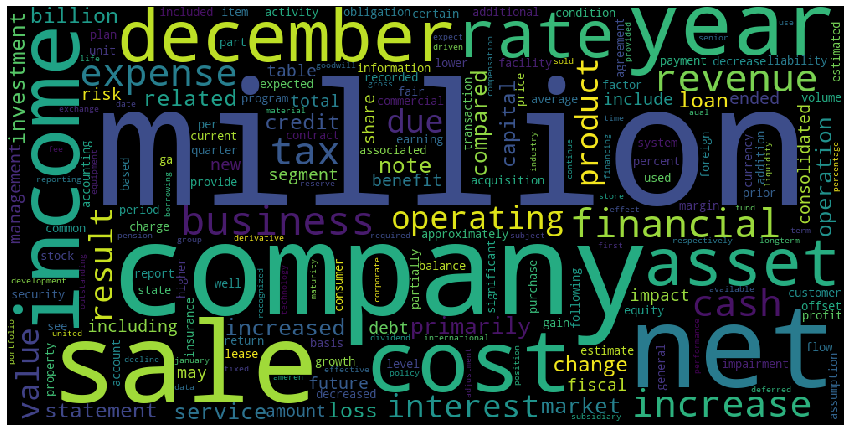

Wall time: 5.84 s


In [119]:
%%time
vocabulary_lists = df['MDA_Tokens'].tolist()
word_cloud_form(vocabulary_lists)

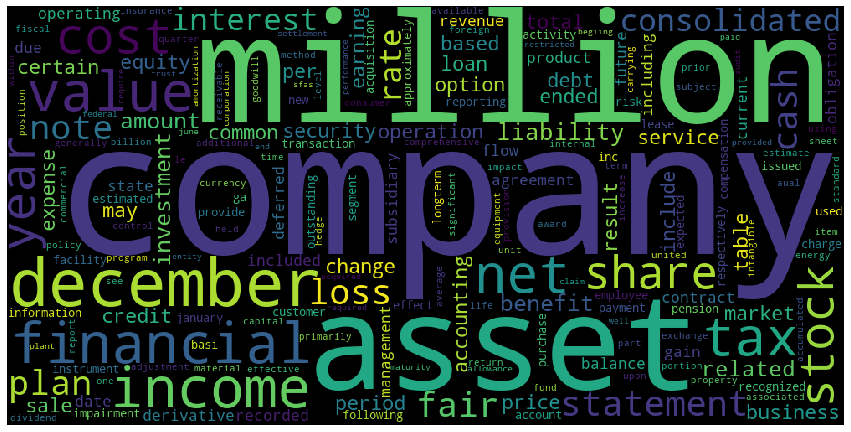

Wall time: 8.08 s


In [120]:
%%time
vocabulary_lists = df['FSS_Tokens'].tolist()
word_cloud_form(vocabulary_lists)

In [121]:
def get_top_n_words(corpus, n=None):
  vec = TfidfVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [122]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
common_words = get_top_n_words(df['BUSINESS'], 20)
#for word, freq in common_words:
  #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.head(8)

Wall time: 6.49 s


In [123]:
def get_top_n_bigram(corpus, n=None):
  vec = TfidfVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [124]:
%%time
common_words = get_top_n_bigram(df['BUSINESS'], 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.head(20)

Wall time: 19.2 s


In [125]:
%%time
def get_top_n_bigram(corpus, n=None):
  vec = TfidfVectorizer(ngram_range=(3, 3)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

Wall time: 0 ns


In [126]:
common_words = get_top_n_bigram(df['BUSINESS'], 20)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.head(20)

ReviewText      count
0                 year ended december  12.318062
1    consolidated financial statement  11.891860
2               senior vice president  11.041059
3          financial condition result  10.981475
4                bank holding company  10.010238
5      management discussion analysis   9.944965
6         note consolidated financial   9.932126
7          condition result operation   9.237051
8               security exchange act   9.122197
9        analysis financial condition   9.052959
10            report pursuant section   8.969555
11                   aual report form   8.872352
12      discussion analysis financial   8.778556
13                indicate check mark   8.439603
14  financial statement supplementary   8.395479
15                       part ii item   8.283506
16                 check mark whether   7.729456
17           executive vice president   7.661098
18       ownership certain beneficial   7.149729
19            mark whether registrant   7.146053

## 7.2 Plotting Over All Report How Data Frame Looks Like

In [127]:
%%time
pandas_profiling.ProfileReport(df)

Wall time: 45.5 s


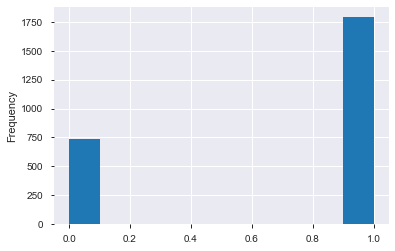

In [128]:
df.long_term_outlook.plot(kind = "hist")

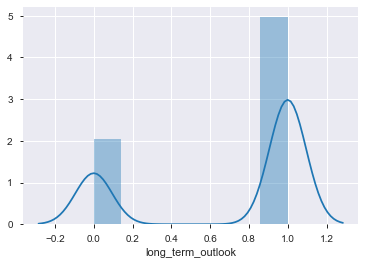

In [129]:
# Recommended way
sns.distplot(df.long_term_outlook)

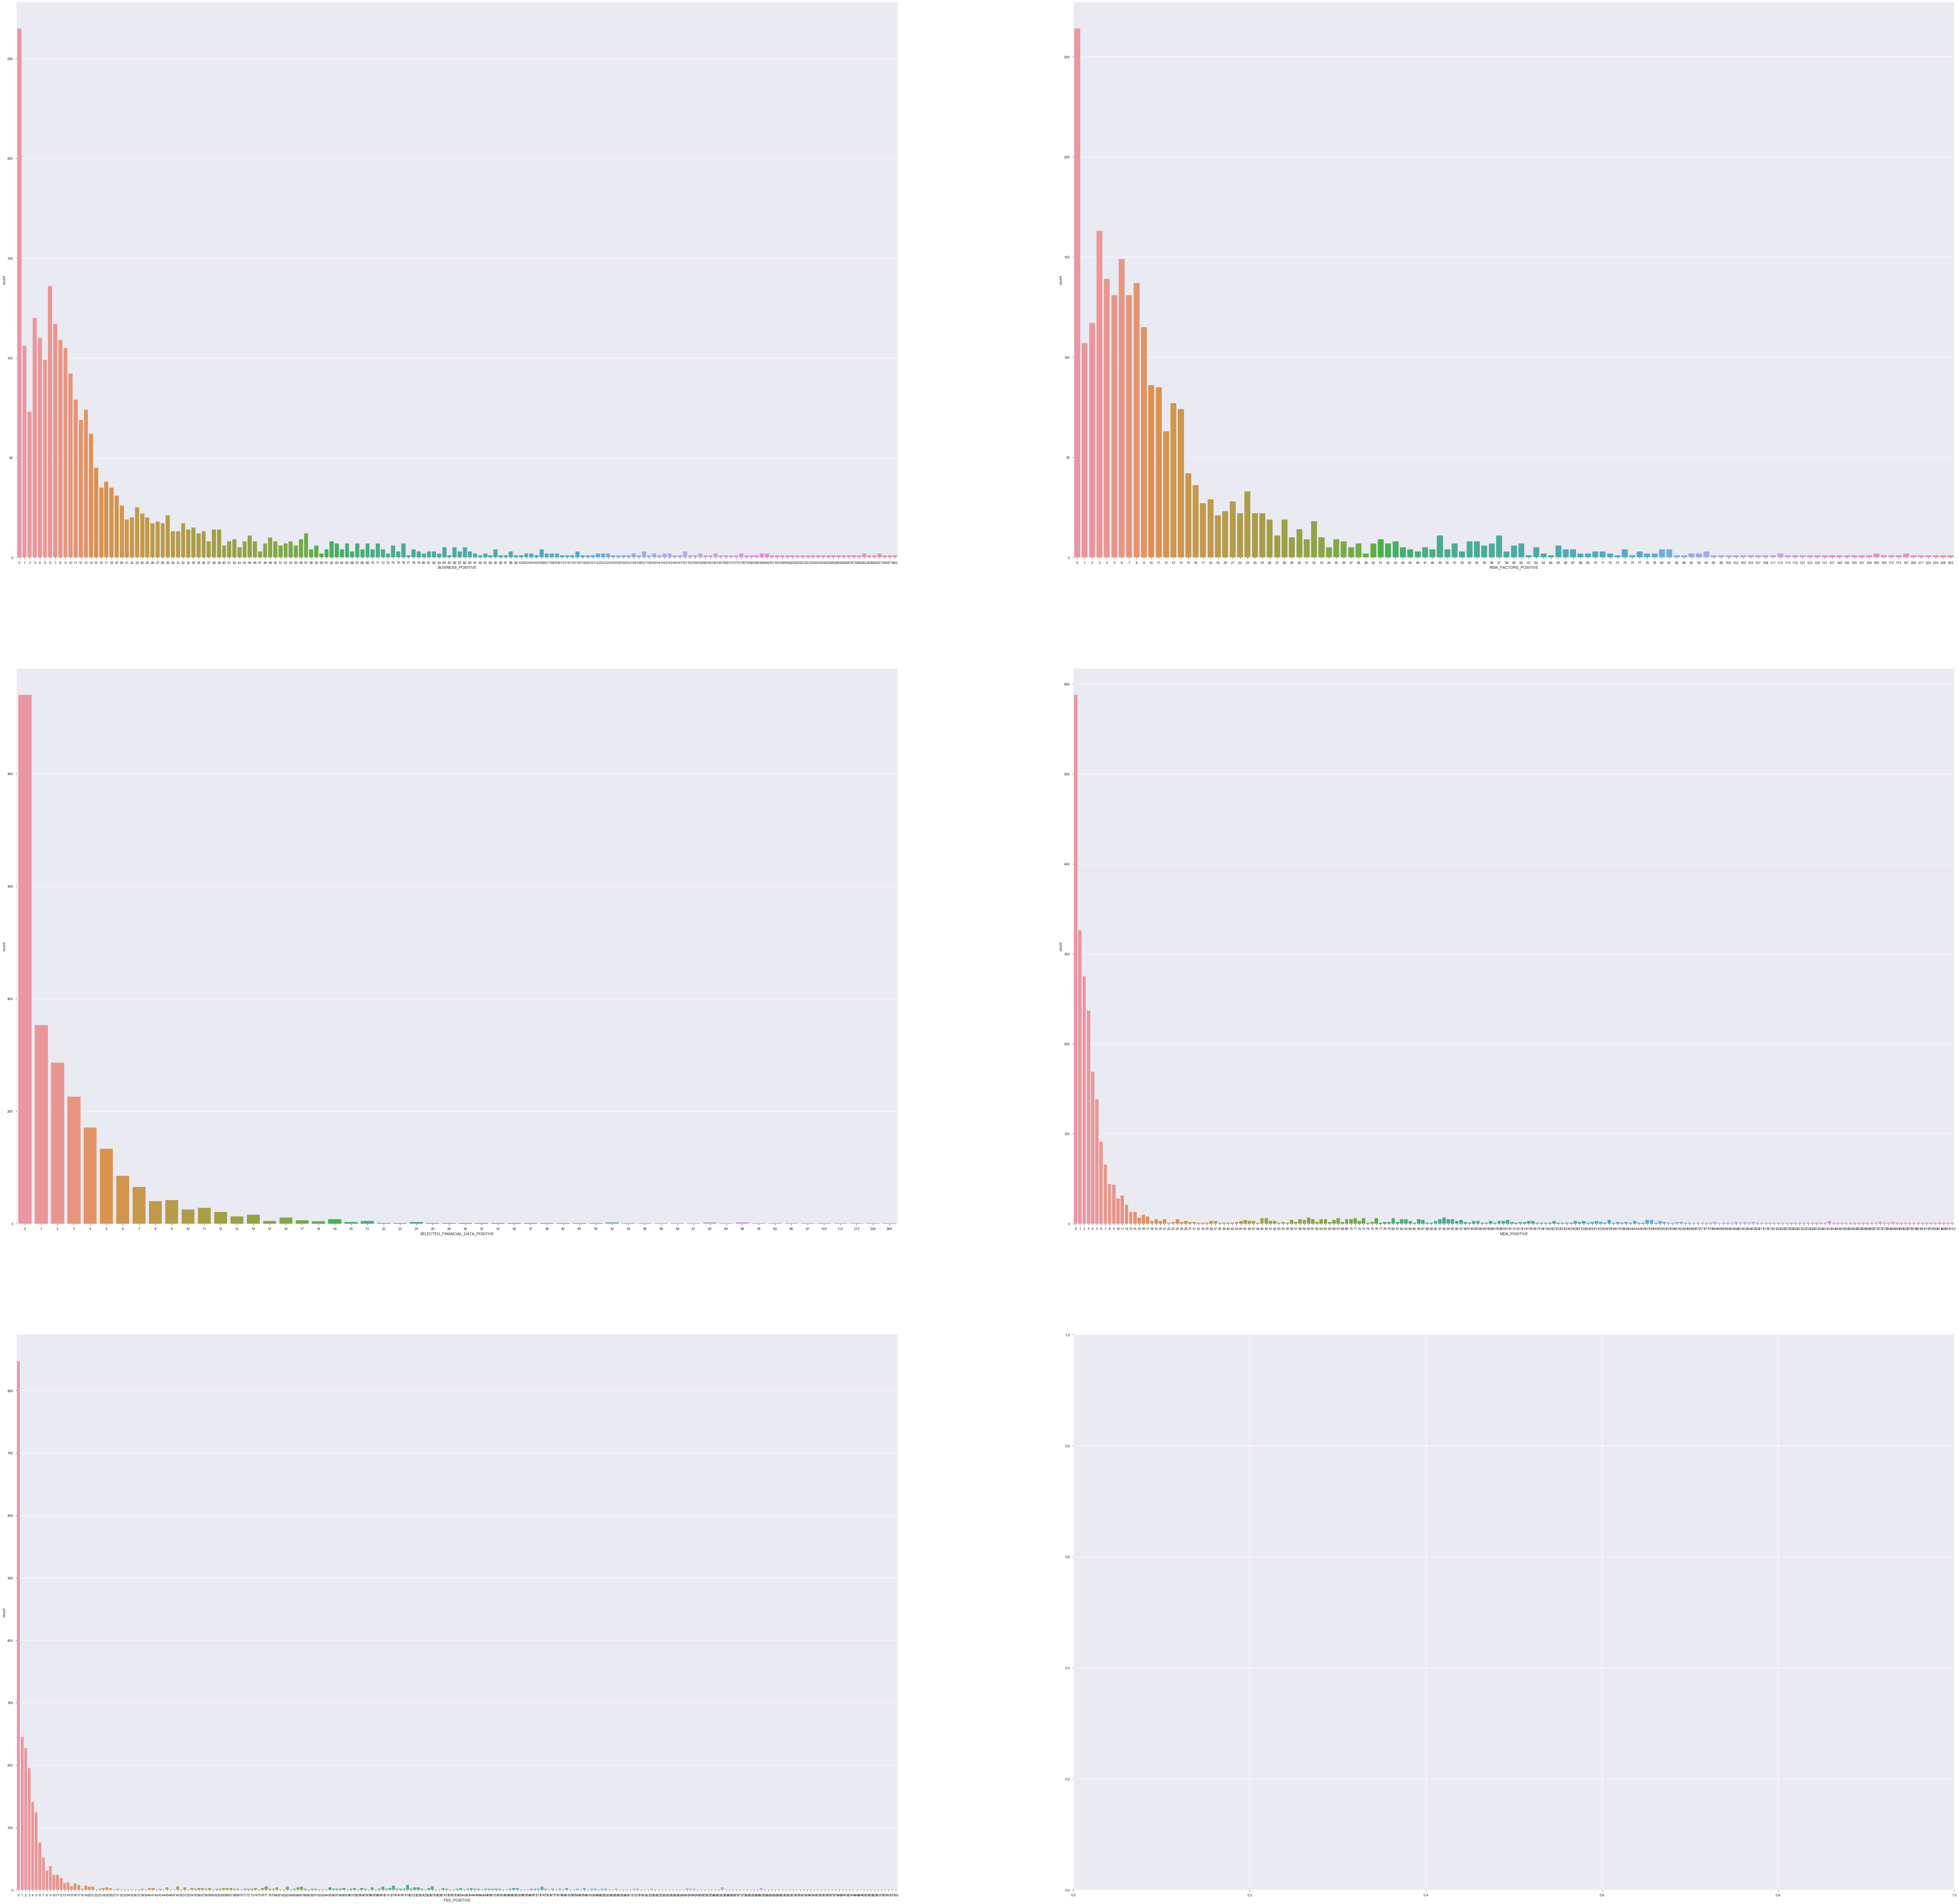

In [134]:
fig, axs = plt.subplots(3,2, figsize = (100,100))
sns.countplot(df['BUSINESS_POSITIVE'], ax = axs[0,0])
sns.countplot(df['RISK_FACTORS_POSITIVE'], ax = axs[0,1])
sns.countplot(df['SELECTED_FINANCIAL_DATA_POSITIVE'], ax = axs[1,0])
sns.countplot(df['MDA_POSITIVE'], ax = axs[1,1])
sns.countplot(df['FSS_POSITIVE'], ax = axs[2,0])
plt.show()

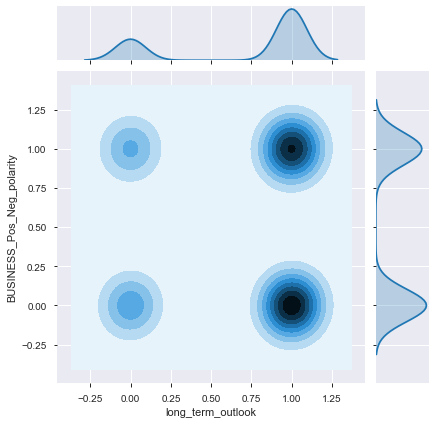

In [135]:
sns.jointplot(x="long_term_outlook", y="BUSINESS_Pos_Neg_polarity", data=df, kind="kde");

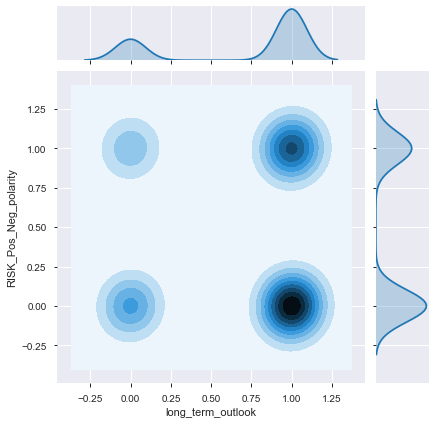

In [136]:
sns.jointplot(x="long_term_outlook", y="RISK_Pos_Neg_polarity", data=df, kind="kde");

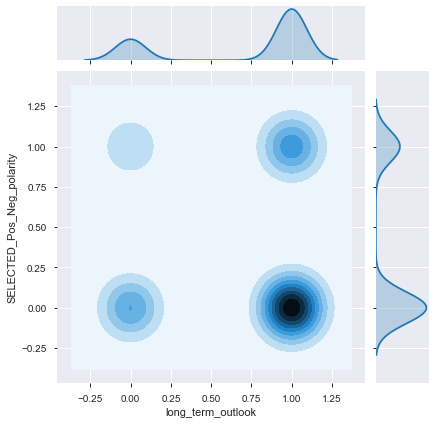

In [137]:
sns.jointplot(x="long_term_outlook", y="SELECTED_Pos_Neg_polarity", data=df, kind="kde");

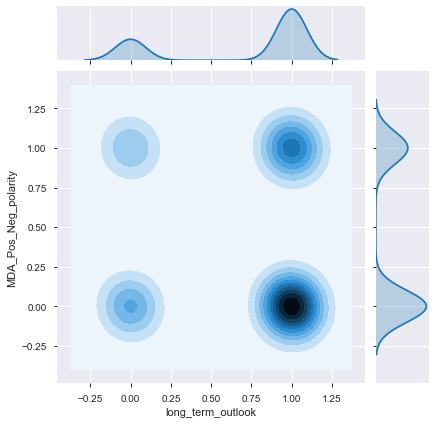

In [138]:
sns.jointplot(x="long_term_outlook", y="MDA_Pos_Neg_polarity", data=df, kind="kde");

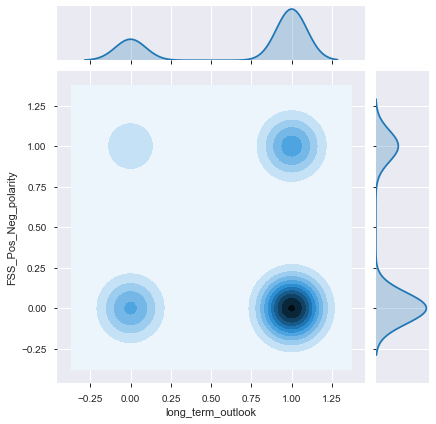

In [139]:
sns.jointplot(x="long_term_outlook", y="FSS_Pos_Neg_polarity", data=df, kind="kde");